In [139]:
import numpy as np              # imports a fast numerical programming library
import scipy as sp              # imports stats functions, amongst other things
import matplotlib as mpl        # this actually imports matplotlib
import matplotlib.cm as cm      # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd             # lets us handle data as dataframes

import seaborn as sns # gives us more plotting options
sns.set_theme()             # sets up styles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [140]:
"""Variables:
Type_of_Renewable_Energy: Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).
Installed_Capacity_MW: Installed capacity in megawatts (MW).
Energy_Production_MWh: Yearly energy production in megawatt-hours (MWh).
Energy_Consumption_MWh: Yearly energy consumption in megawatt-hours (MWh).
Energy_Storage_Capacity_MWh: Energy storage capacity in megawatt-hours (MWh).
Storage_Efficiency_Percentage: Efficiency of energy storage systems in percentage.
Grid_Integration_Level: Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).
Initial_Investment_USD: Initial investment costs in USD.
Funding_Sources: Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).
Financial_Incentives_USD: Financial incentives in USD.
GHG_Emission_Reduction_tCO2e: Reduction in greenhouse gas emissions in tons of CO2 equivalent (tCO2e).
Air_Pollution_Reduction_Index: Air pollution reduction index.
Jobs_Created: Number of jobs created.

Where I found the dataset: https://www.kaggle.com/datasets/girumwondemagegn/dataset-for-renewable-energy-systems
"""



'Variables:\nType_of_Renewable_Energy: Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).\nInstalled_Capacity_MW: Installed capacity in megawatts (MW).\nEnergy_Production_MWh: Yearly energy production in megawatt-hours (MWh).\nEnergy_Consumption_MWh: Yearly energy consumption in megawatt-hours (MWh).\nEnergy_Storage_Capacity_MWh: Energy storage capacity in megawatt-hours (MWh).\nStorage_Efficiency_Percentage: Efficiency of energy storage systems in percentage.\nGrid_Integration_Level: Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).\nInitial_Investment_USD: Initial investment costs in USD.\nFunding_Sources: Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).\nFinancial_Incentives_USD: Financial incentives in USD.\nGHG_Emission_Reduct

In [141]:
#import dataset into DataFrame
EnergyDF = pd.read_csv('energy_dataset_.csv')
#Inspect attributes of dataset
EnergyDF.info()
EnergyDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


Text(0, 0.5, 'Total Energy Production (MWh)')

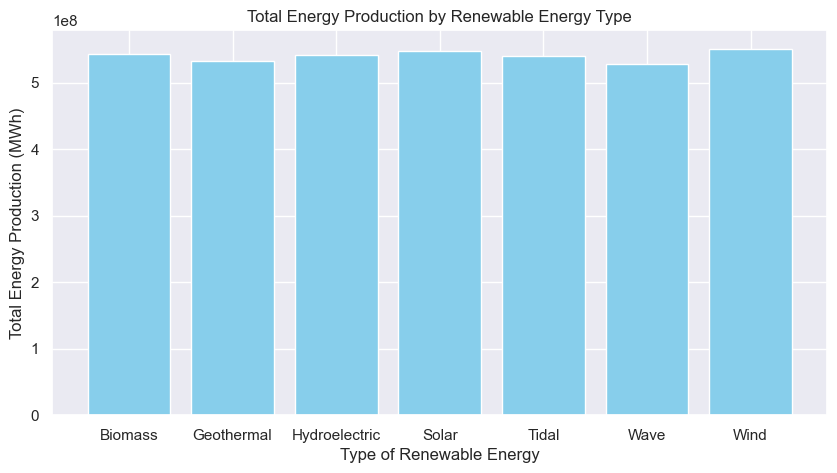

In [142]:
#Next steps, begin looking into ways that other predictors work into the 
#"Energy Production" predictor

energy_type_map = {
    1: 'Solar',
    2: 'Wind',
    3: 'Hydroelectric',
    4: 'Geothermal',
    5: 'Biomass',
    6: 'Tidal',
    7: 'Wave'
}
EnergyDF['Energy_Type'] = EnergyDF['Type_of_Renewable_Energy'].map(energy_type_map)
#Using EnergyProdDF for now

EnergyProdDF = EnergyDF.groupby('Energy_Type')['Energy_Production_MWh'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(EnergyProdDF['Energy_Type'], EnergyProdDF['Energy_Production_MWh'], color='skyblue')
plt.title('Total Energy Production by Renewable Energy Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Total Energy Production (MWh)')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Biomass'),
  Text(1, 0, 'Geothermal'),
  Text(2, 0, 'Hydroelectric'),
  Text(3, 0, 'Solar'),
  Text(4, 0, 'Tidal'),
  Text(5, 0, 'Wave'),
  Text(6, 0, 'Wind')])

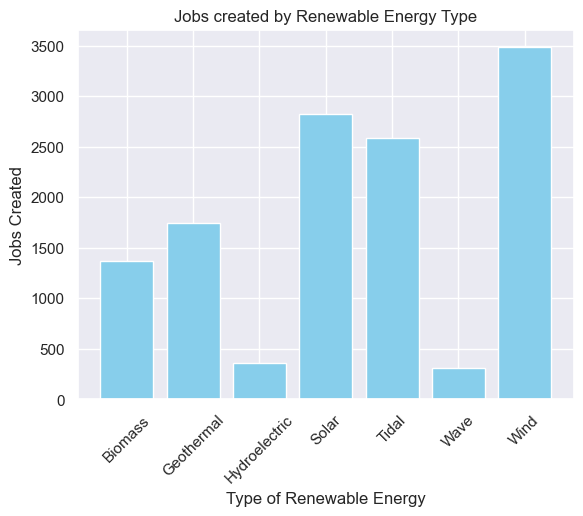

In [143]:
"""However, is there some correlation between the amount of energy produced
and jobs being produced?"""

EnergyProdDF["Jobs_Created"] = EnergyDF['Jobs_Created']
plt.bar(EnergyProdDF['Energy_Type'], EnergyProdDF['Jobs_Created'], color='skyblue')
plt.title('Jobs created by Renewable Energy Type')
plt.xlabel('Type of Renewable Energy')
plt.ylabel('Jobs Created')
plt.xticks(rotation=45)

#Interesting. A clearly disproportionate amount of jobs being created based on type of energy


Now that we can see that there are CLEAR differences within the data, lets begin discovering which is 'best'.


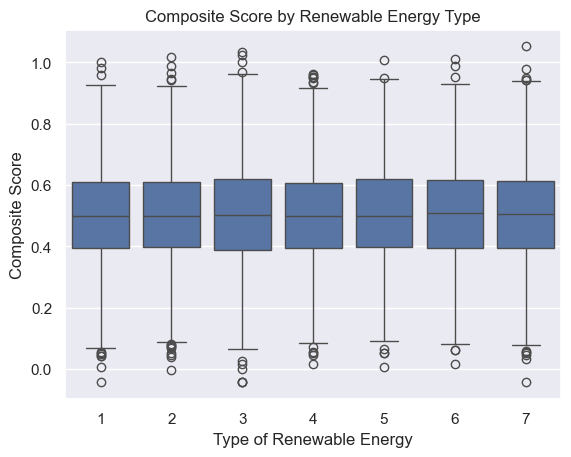

In [144]:
print("Now that we can see that there are CLEAR differences within the data, lets begin discovering which is 'best'.")

#How to do that? Composite target variable.


featureList = [
    'Type_of_Renewable_Energy',
    'Installed_Capacity_MW',
    'Energy_Production_MWh',
    'Energy_Consumption_MWh',
    'Energy_Storage_Capacity_MWh',
    'Storage_Efficiency_Percentage',
    'Grid_Integration_Level',
    'Initial_Investment_USD',
    'Funding_Sources',
    'Financial_Incentives_USD',
    'GHG_Emission_Reduction_tCO2e',
    'Air_Pollution_Reduction_Index',
    'Jobs_Created'
]

scaler = MinMaxScaler()
normalized = scaler.fit_transform(EnergyDF[featureList])
normalized_df = pd.DataFrame(normalized, columns=[col + "_norm" for col in featureList])


for col in normalized_df.columns:
    EnergyDF[col] = normalized_df[col]

#Assigning weights
weights = {
    'Installed_Capacity_MW_norm': 0.1,
    'Energy_Production_MWh_norm': 0.3,
    'Energy_Consumption_MWh_norm': -0.2,  # lower consumption = better?
    'Energy_Storage_Capacity_MWh_norm': 0.2,
    'Storage_Efficiency_Percentage_norm': 0.2,
    'Grid_Integration_Level_norm': 0.05,
    'Initial_Investment_USD_norm': -0.15,  # lower cost = better?
    'Financial_Incentives_USD_norm': 0.1,
    'GHG_Emission_Reduction_tCO2e_norm': 0.15,
    'Air_Pollution_Reduction_Index_norm': 0.15,
    'Jobs_Created_norm': 0.1
}

EnergyDF['composite_score'] = sum(
    EnergyDF[feature] * weight for feature, weight in weights.items()
)
sns.boxplot(x='Type_of_Renewable_Energy', y='composite_score', data=EnergyDF)
plt.title("Composite Score by Renewable Energy Type")
plt.xlabel("Type of Renewable Energy")
plt.ylabel("Composite Score")
plt.show()


In [145]:
EnergyDF_sorted = EnergyDF.sort_values(by='composite_score', ascending=False)
top_10 = EnergyDF_sorted.head(10)
print(top_10[['Type_of_Renewable_Energy', 'composite_score']])
print("Based on this, seemingly the 'best' type of Renwewable energy is Wave energy, but there are most instances of Hydroelectric in the top 10.")


       Type_of_Renewable_Energy  composite_score
2995                          7         1.051557
3449                          3         1.032490
3153                          3         1.023789
14290                         2         1.015730
10649                         6         1.009037
5883                          5         1.007975
2203                          1         1.002168
7274                          3         1.000406
9777                          6         0.988520
2657                          2         0.986241
Based on this, seemingly the 'best' type of Renwewable energy is Wave energy, but there are most instances of Hydroelectric in the top 10.


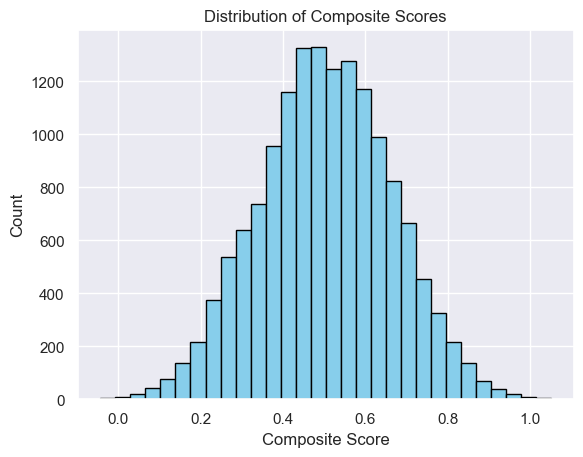

In [146]:
plt.hist(EnergyDF['composite_score'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Composite Scores")
plt.xlabel("Composite Score")
plt.ylabel("Count")
plt.show()

In [147]:
energyCompScores = EnergyDF.groupby("Type_of_Renewable_Energy")['composite_score'].agg(['mean', 'std', 'count'])
print(energyCompScores)
print("Due to the mean of the composite score being mostly in the 0.4-0.6 range, it makes sense that the mean is so close.")

                              mean       std  count
Type_of_Renewable_Energy                           
1                         0.499207  0.157652   2169
2                         0.502336  0.160586   2202
3                         0.502313  0.167105   2157
4                         0.500333  0.156159   2105
5                         0.505340  0.159173   2150
6                         0.505559  0.159219   2124
7                         0.501673  0.162690   2093
Due to the mean of the composite score being mostly in the 0.4-0.6 range, it makes sense that the mean is so close.


In [148]:
#Create regression model
X = EnergyDF.drop(columns=['composite_score', 'Type_of_Renewable_Energy'])
X = pd.get_dummies(X, drop_first=True)

y = EnergyDF["composite_score"]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("High r2 score means high explaination of variance, but a value of 1 (perfect) is suspicious.")
print("Lets try other models!")



MSE: 4.2178519291338334e-26
R² Score: 1.0
High r2 score means high explaination of variance, amd a value of 1 (perfect) is suspicious.
Lets try other models!


R2 score:  0.8954726787732494
Interesting, a lower score than before. What does it mean?


<Axes: title={'center': 'Feature Importance'}>

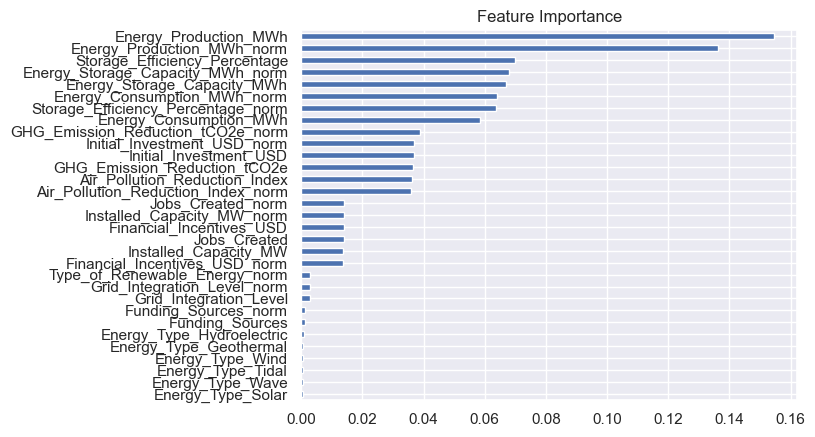

In [150]:
randForest = RandomForestRegressor(n_estimators=100, random_state=42)
randForest.fit(x_train, y_train)
print("R2 score: ", randForest.score(x_test, y_test))
print("Interesting, a lower score than before. What does it mean?")

importances = pd.Series(randForest.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title="Feature Importance")
